In [28]:
from ema_workbench import (MultiprocessingEvaluator,SequentialEvaluator, ema_logging, save_results, load_results)
from SALib.analyze import sobol
from ema_workbench.em_framework.evaluators import SOBOL
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_problem_definitions import ema_problem

In [2]:
# enable logging
ema_logging.LOG_FORMAT = '%(message)s'
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [3]:
# import problem definition
model = ema_problem(1)

In [4]:
with MultiprocessingEvaluator(model, n_processes=14) as evaluator:
    experiment_SOBOL, outcomes_SOBOL = evaluator.perform_experiments(scenarios = 5, uncertainty_sampling=SOBOL)

pool started
/home/tevito/anaconda3/envs/aabm/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (5) is equal to `2^n`.
        
  warnings.warn(msg)
performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
10 cases completed
20 cases completed
30 cases completed
40 cases completed
50 cases completed
60 cases completed
70 cases completed
80 cases completed
90 cases completed
100 cases completed
experiments finished
terminating pool


In [16]:
# prepare SOBOL from results
def get_sobol_results(variable):
    problem = get_SALib_problem(model.uncertainties)
    Si = sobol.analyze(problem, outcomes_SOBOL[variable],
                    calc_second_order=True, print_to_console=False)
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3)
    plt.show()

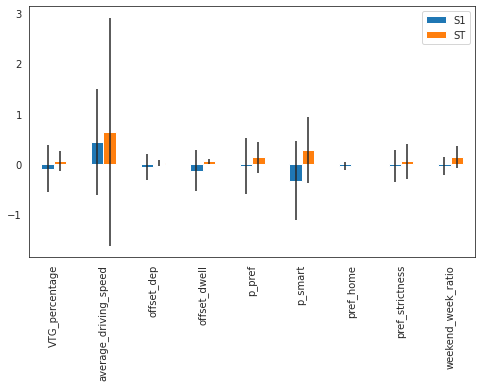

In [23]:
get_sobol_results('mean_power_demand')

In [27]:
pd.DataFrame(experiment_SOBOL)

,VTG_percentage,average_driving_speed,offset_dep,offset_dwell,p_pref,p_smart,pref_home,pref_strictness,weekend_week_ratio,scenario,policy,model
0,0.09375,14.0,2.0,3.0,0.28125,0.96875,0.53125,0.84375,0.46875,0,None,EtmEVsModel
1,0.15625,14.0,2.0,3.0,0.28125,0.96875,0.53125,0.84375,0.46875,1,None,EtmEVsModel
2,0.09375,6.0,2.0,3.0,0.28125,0.96875,0.53125,0.84375,0.46875,2,None,EtmEVsModel
3,0.09375,14.0,2.0,3.0,0.28125,0.96875,0.53125,0.84375,0.46875,3,None,EtmEVsModel
4,0.09375,14.0,2.0,3.0,0.28125,0.96875,0.53125,0.84375,0.46875,4,None,EtmEVsModel
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.53125,25.0,0.0,3.0,0.03125,0.84375,0.90625,0.65625,0.46875,95,None,EtmEVsModel
96,0.53125,25.0,0.0,3.0,0.03125,0.21875,0.90625,0.65625,0.46875,96,None,EtmEVsModel
97,0.53125,25.0,0.0,3.0,0.03125,0.21875,0.90625,0.21875,0.46875,97,None,EtmEVsModel
98,0.53125,25.0,0.0,3.0,0.03125,0.21875,0.90625,0.65625,0.59375,98,None,EtmEVsModel


In [37]:
sobol_results = save_results((experiment_SOBOL, outcomes_SOBOL), '../data/ema/sobol_results.tar.gz')

results saved successfully to /home/tevito/Documents/EPA/Year2/Q2/SEN9120/git/SEN9120_Advanced_Agent_Based_Modelling/data/ema/sobol_results.tar.gz


In [38]:
experiment_SOBOL, outcomes_SOBOL = load_results('sobol_results.tar.gz')

results loaded succesfully from /home/tevito/Documents/EPA/Year2/Q2/SEN9120/git/SEN9120_Advanced_Agent_Based_Modelling/model/sobol_results.tar.gz
